## Final Project

Name: Dempsey Wade, Dylan Zucker, Gabe Gomez

Class: CSCI 349 - Intro to Data Mining 

Semester: 2019SP 

Instructor: Brian King

## Imports we use or plan to use

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from mlxtend.preprocessing import standardize, TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

### Read in Dataset

In [2]:
speed = pd.read_csv('./data/SpeedDatingData.csv', header = None, encoding = "ISO-8859-1")
speed = speed.rename(columns = speed.iloc[0]) #Rename columns appropriately
speed = speed.drop([0]) #Remove row containing index
speed.head()

#Gender: Female = 0, Male = 1

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,39,40,41,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1,1,1,0,1,1,1,10,7,NaN,4,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,3,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,10,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,5,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
5,1,1,0,1,1,1,10,7,NaN,7,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN


In [3]:
# Create a new dataset the will hold the variables we find important
# TODO ADD THE PARTNERS INFORMATION TO EACH ROW!!!
df_date = speed[["iid", "idg", "id", "pid","age","age_o","gender","samerace","field_cd","career_c","mn_sat","income","dec","intel","shar", "attr", "attr_o", 'match']]

#Convert to appropriate types
df_date[["iid","pid"]] = df_date[["iid","pid"]].astype("str")
df_date[["age", "attr", "attr_o", "field_cd", "shar"]] = df_date[["age", "attr", "attr_o", "field_cd","shar"]].apply(pd.to_numeric)
df_date["attr_o"] = df_date["attr_o"].astype("category")
df_date["attr"] = df_date["attr"].astype("category")
df_date["mn_sat"] = pd.to_numeric(df_date["mn_sat"].str.replace(',', ''))
df_date["attr_num"] = pd.to_numeric(df_date["attr"]) 
df_date["intel"] = pd.to_numeric(df_date["intel"]) 
df_date["age_o"] = df_date["age_o"].astype("float")
df_date["career_c"] = df_date["career_c"].astype("float")
df_date.head()

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,iid,idg,id,pid,age,age_o,gender,samerace,field_cd,career_c,mn_sat,income,dec,intel,shar,attr,attr_o,match,attr_num
1,1,1,1,11,21.0,27.0,0,0,1.0,NaN,NaN,"69,487.00",1,7.0,5.0,6.0,6.0,0,6.0
2,1,1,1,12,21.0,22.0,0,0,1.0,NaN,NaN,"69,487.00",1,7.0,6.0,7.0,7.0,0,7.0
3,1,1,1,13,21.0,22.0,0,1,1.0,NaN,NaN,"69,487.00",1,9.0,7.0,5.0,10.0,1,5.0
4,1,1,1,14,21.0,23.0,0,0,1.0,NaN,NaN,"69,487.00",1,8.0,8.0,7.0,7.0,1,7.0
5,1,1,1,15,21.0,24.0,0,0,1.0,NaN,NaN,"69,487.00",1,7.0,6.0,5.0,8.0,1,5.0


In [4]:
# Find the mean of 3 important variables that we ranked by their partners
# shar: Shared interests
# intel: How intelligent their partner found them to be
# attr_num: Average rating for all 6 attributes

avg_rating = df_date.groupby("pid")[["shar", "intel", "attr_num"]].mean() 

avg_rating = avg_rating[avg_rating.index != "nan"] 
avg_rating.head()

,shar,intel,attr_num
pid,,,
1,7.100000,8.000000,6.700000
10,5.777778,6.400000,6.333333
100,5.642857,8.000000,4.555556
101,4.294118,7.666667,4.000000
102,4.277778,7.277778,4.111111


In [5]:
#New dataframe based off of important variables
df_people = pd.DataFrame(columns=['iid', 'age', 'gender',
       'field_cd', 'career_c', 'mn_sat', 'income',"avg_shar", 
                                  "avg_intel", "avg_attr"])

# Convert to proper types and sort
avg_rating.index = avg_rating.index.astype(int)
avg_rating = avg_rating.sort_index()
avg_rating.index = avg_rating.index.astype(str)
avg_rating = pd.DataFrame(avg_rating)
avg_rating = avg_rating.reset_index()


#avg_rating.drop_duplicates("pid", keep="last",inplace = True)
avg_rating = avg_rating.set_index("pid")
for i in avg_rating.index:
    person = df_date[df_date["iid"] == str(i)]
    row = avg_rating[avg_rating.index == str(i)]
    try:
        person = person.reset_index()
        person = person.loc[0]
    except:
        print("error!!!")
        print(i)
        print(row)
        print(person)
        break
   
    new_row = pd.DataFrame({'iid':person["iid"], 'age':person["age"], 'gender':person["gender"], 'field_cd':person["field_cd"], 'career_c':person["career_c"], 'mn_sat':person["mn_sat"], 'income':person["income"],"avg_shar":row["shar"], "avg_intel":row["intel"], "avg_attr":row["attr_num"]}, index=[i])
    df_people = df_people.append(new_row)

df_people.head(10)

,iid,age,gender,field_cd,career_c,mn_sat,income,avg_shar,avg_intel,avg_attr
1,1,21.0,0,1.0,NaN,NaN,"69,487.00",7.100000,8.0,6.700000
2,2,24.0,0,1.0,NaN,NaN,"65,929.00",6.500000,7.9,7.700000
3,3,25.0,0,2.0,NaN,NaN,NaN,6.000000,7.3,6.500000
4,4,23.0,0,1.0,1.0,NaN,"37,754.00",7.200000,7.7,7.000000
5,5,21.0,0,1.0,1.0,NaN,"86,340.00",6.200000,7.6,5.300000
6,6,23.0,0,1.0,1.0,NaN,"60,304.00",6.300000,8.6,6.800000
7,7,22.0,0,1.0,1.0,NaN,"54,620.00",6.700000,8.2,7.900000
8,8,25.0,0,13.0,6.0,NaN,NaN,6.800000,8.1,8.200000
9,9,26.0,0,13.0,9.0,NaN,NaN,6.300000,7.5,7.000000
10,10,26.0,0,13.0,9.0,NaN,"48,652.00",5.777778,6.4,6.333333


## Variable inspection

In [6]:
#How many missing variables for income
display(df_people.shape[0] - df_people["income"].isna().sum().sum())
display(df_people.shape)

281

(551, 10)

In [7]:
# Checking if iids are unique so we can use them to check what others rate them
speed[speed["iid"]=="1"]["income"]

1     69,487.00
2     69,487.00
3     69,487.00
4     69,487.00
5     69,487.00
6     69,487.00
7     69,487.00
8     69,487.00
9     69,487.00
10    69,487.00
Name: income, dtype: object

In [8]:
df_date.shape[0] - df_date["income"].isna().sum().sum()

4279

In [9]:
speed.shape

(8378, 195)

## Further cleaning of our data

In [10]:
list(df_people)

['iid',
 'age',
 'gender',
 'field_cd',
 'career_c',
 'mn_sat',
 'income',
 'avg_shar',
 'avg_intel',
 'avg_attr']

#### Fixing issue with gender typing

In [11]:
# Counts 0 and '0' as different variables
df_people.gender.value_counts()

1    149
0    147
1    128
0    127
Name: gender, dtype: int64

In [12]:
#Gender issue now fixed
df_people.gender = df_people.gender.astype(int)
df_date.gender = df_date.gender.astype(int)
df_people['gender'].value_counts()

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1    277
0    274
Name: gender, dtype: int64

In [13]:
#Check age
age_count = df_people.age.value_counts().sort_values()
if age_count.count() == len(age_count):
    print('Correct age count')

#Check iid
iid_count = df_people.iid.value_counts().sort_values()
if iid_count.count() == len(iid_count):
    print('Correct iid count')

Correct age count
Correct iid count


In [14]:
## Changing income from object to float
df_people["income"] = df_people["income"].apply(lambda x: float(str(x).replace(",","")))
df_date["income"] = df_date["income"].apply(lambda x: float(str(x).replace(",","")))
df_people['income'].head()

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    69487.0
2    65929.0
3        NaN
4    37754.0
5    86340.0
Name: income, dtype: float64

In [15]:
df_date.gender = df_date.gender.astype(int)
df_date['gender'].value_counts()

1    4194
0    4184
Name: gender, dtype: int64

In [16]:
df_date.match.value_counts()

0    3600
0    3398
1     697
1     683
Name: match, dtype: int64

In [17]:
df_date.match = df_date.match.astype(int)
df_date['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [18]:
df_date.samerace = df_date.samerace.astype(int)
df_date['samerace'].value_counts()

0    5062
1    3316
Name: samerace, dtype: int64

## EDA plots

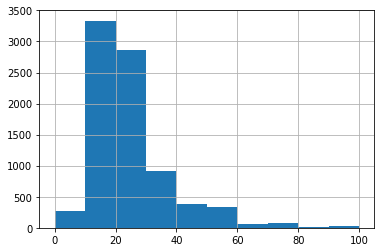

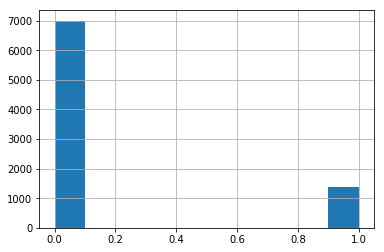

In [19]:
att = pd.to_numeric(speed.pf_o_att, errors = 'coerse') #Attribute score
match = pd.to_numeric(speed.match, errors = 'coerse') #1 for success, 0 for fail

att.hist()
plt.show()

match.hist() #An overwhelming number of no matches...
plt.show()
match_counts = match.value_counts()
#match_counts

#att.value_counts()


In [20]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 1 to 8378
Columns: 195 entries, iid to amb5_3
dtypes: object(195)
memory usage: 12.5+ MB


In [21]:
df_date.columns

Index(['iid', 'idg', 'id', 'pid', 'age', 'age_o', 'gender', 'samerace',
       'field_cd', 'career_c', 'mn_sat', 'income', 'dec', 'intel', 'shar',
       'attr', 'attr_o', 'match', 'attr_num'],
      dtype='object')

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


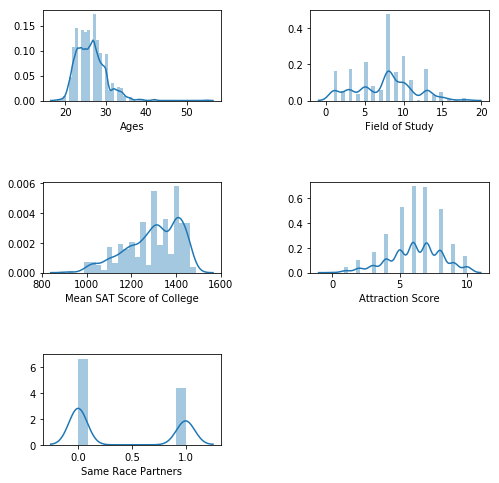

In [22]:
varis = ['age', 'field_cd', 'mn_sat','attr', 'samerace'] 
x_labels = ["Ages", "Field of Study", "Mean SAT Score of College", "Attraction Score", "Same Race Partners"]
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.9, wspace=0.5)
for i in range(1, len(varis)+1):
    v = varis[i-1]
    x = df_date[v]
    ax = fig.add_subplot(3, 2, i)
    sns.distplot(x.dropna().astype(int))
    ax.set_xlabel(x_labels[i-1])
plt.show()

## These EDA Plots are important variables against attraction rate, colored with match

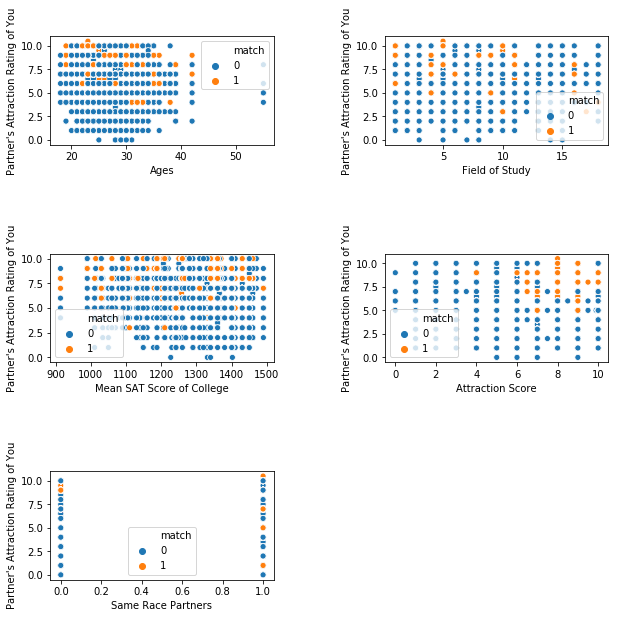

In [23]:
varis = ['age', 'field_cd', 'mn_sat','attr', 'samerace'] 
x_labels = ["Ages", "Field of Study", "Mean SAT Score of College", "Attraction Score", "Same Race Partners"]
color_dict = {0: 'red', 1:'blue'}
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
for i in range(1, len(varis)+1):
    v = varis[i-1]
    x = df_date[v]
    #print(df_date['gender'])
    #sns.distplot(x.dropna().astype(int), color = (df_date.gender))
    ax = fig.add_subplot(3, 2, i)
    sns.scatterplot(v, 'attr_o', hue = "match", data = df_date)
    ax.set_xlabel(x_labels[i-1])
    plt.ylabel('Partner\'s Attraction Rating of You')
    #plt.xlabel(v)
plt.show()

The last graph in the above cell is important. 

You can see a fairly strong correlation between match and attraction rating. The top right of the graph, where the cluster of matches are, is when you rate someone high in attraction and they also rated you high.
While it's not that surprising, it speaks to the credibility of our data. 

## These EDA plots show the count of important variables, colored with match

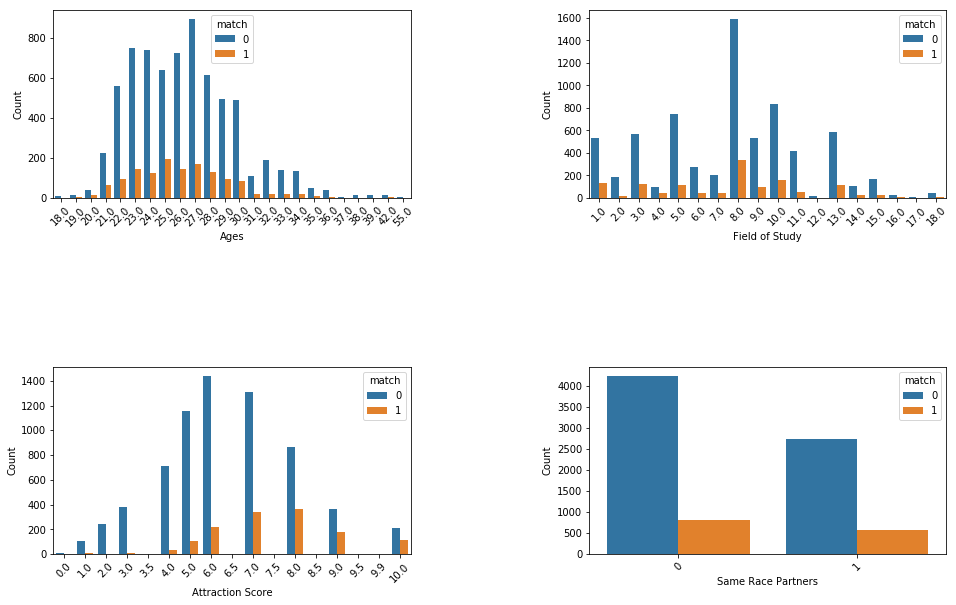

In [24]:
varis = ['age', 'field_cd','attr', 'samerace'] 
x_labels = ["Ages", "Field of Study", "Attraction Score", "Same Race Partners"]
color_dict = {0: 'red', 1:'blue'}
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.9, wspace=0.5)
for i in range(1, len(varis)+1):
    v = varis[i-1]
    #plt.figure(figsize=(10,6))
    x = df_date[v]
    ax = fig.add_subplot(2, 2, i)
    #print(df_date['gender'])
    #sns.distplot(x.dropna().astype(int), color = (df_date.gender))
    sns.countplot(v, hue = "match", data = df_date)
    ax.set_xlabel(x_labels[i-1])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylabel('Count')
    #plt.xlabel(v)
plt.show()

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


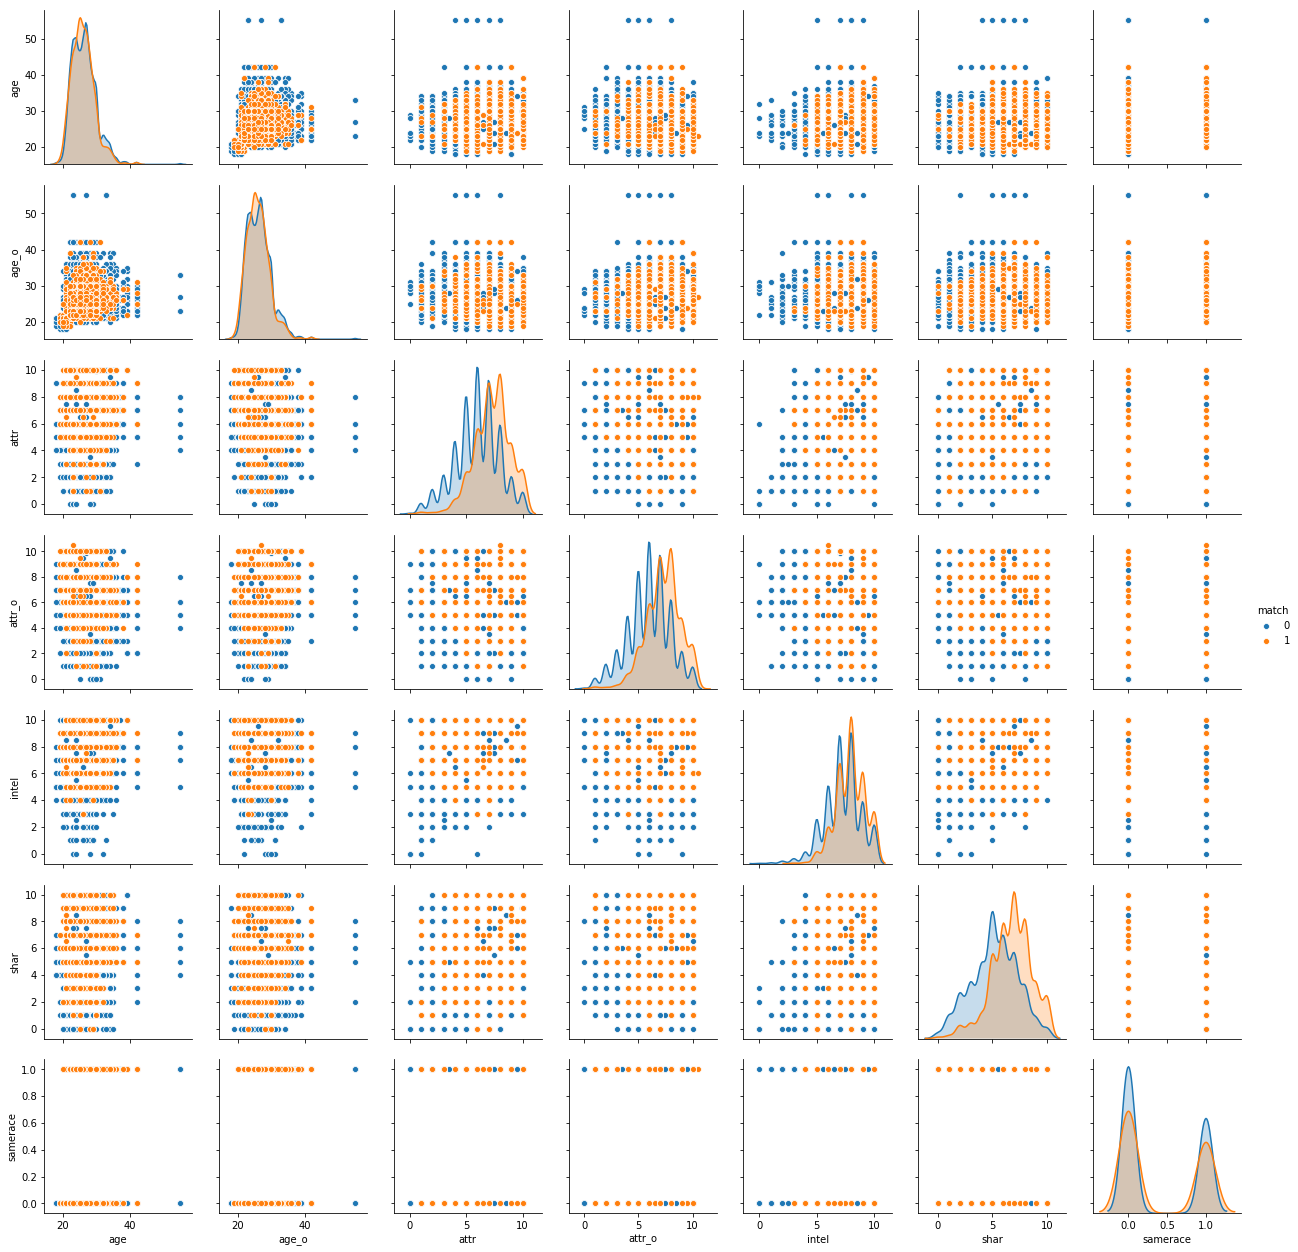

In [25]:
sns.pairplot(df_date, hue = "match",vars=["age", "age_o","attr","attr_o","intel","shar", "samerace"])
plt.show()

In [26]:
speed["intel"].describe()

count     8082.0
unique      31.0
top          8.0
freq      1101.0
Name: intel, dtype: float64

## Reduce memory

In [27]:
initialMemory = df_people.memory_usage().sum()
print('Total size of dataset:', initialMemory/1000, 'Kb') 
# Initial size is 8780.144 Kb

Total size of dataset: 48.488 Kb


In [28]:
# TODO some of these might have to be categories????
for i in df_people.columns: #Downcasts int and float variables to save memory
    df_people[i] = pd.to_numeric(df_people[i], downcast = 'integer', errors = 'coerce') 
    df_people[i] = pd.to_numeric(df_people[i], downcast = 'float', errors = 'coerce')

In [29]:
downcastMemory = df_people.memory_usage().sum()
print('Current size of dataset:', downcastMemory/1000, 'Kb') 

print('Dataset now', downcastMemory/initialMemory*100, '% of original size')

Current size of dataset: 23.693 Kb
Dataset now 48.86363636363637 % of original size


## Below is what we are currently working on towards Phase II

## Association Rule Mining

In [30]:
df_match = df_date[df_date["match"] == 1] # Creating a DF of those who got matches

### Checking for overall patterns with matches

In [34]:
# Retry
df_match[["age",'age_o', 'gender', 'samerace', 'field_cd', 'intel', 'shar','attr', 'attr_o' ]] = df_match[["age",'age_o', 'gender', 'samerace', 'field_cd', 'intel', 'shar','attr', 'attr_o' ]].astype("category")
df_bin_match = pd.get_dummies(df_match[['age', 'age_o', 'gender', 'samerace', 'field_cd', 'intel', 'shar','attr', 'attr_o']])

df_frequent = apriori(df_bin_match, min_support=0.006, use_colnames=True)


/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [35]:
match_assoc_rules = association_rules(df_frequent, metric="support", min_threshold=.01)
match_assoc_rules.sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11777,"(field_cd_9.0, samerace_0, age_25.0)",(gender_0),0.010870,0.500000,0.010870,1.0,2.000000,0.005435,inf
4036,"(field_cd_9.0, age_29.0)",(gender_0),0.010870,0.500000,0.010870,1.0,2.000000,0.005435,inf
15835,"(field_cd_13.0, attr_7.0, gender_1)",(samerace_0),0.010145,0.589855,0.010145,1.0,1.695332,0.004161,inf
11704,"(field_cd_5.0, age_23.0, intel_7.0)",(gender_1),0.011594,0.500000,0.011594,1.0,2.000000,0.005797,inf
6303,"(field_cd_11.0, samerace_0)",(gender_0),0.013768,0.500000,0.013768,1.0,2.000000,0.006884,inf
1840,"(age_22.0, field_cd_3.0)",(gender_0),0.013043,0.500000,0.013043,1.0,2.000000,0.006522,inf
4768,"(field_cd_9.0, age_o_25.0)",(gender_0),0.011594,0.500000,0.011594,1.0,2.000000,0.005797,inf
2312,"(field_cd_5.0, age_24.0)",(gender_1),0.014493,0.500000,0.014493,1.0,2.000000,0.007246,inf
11718,"(field_cd_5.0, age_24.0, samerace_0)",(gender_1),0.010145,0.500000,0.010145,1.0,2.000000,0.005072,inf
13328,"(attr_o_7.0, field_cd_8.0, age_o_25.0)",(gender_1),0.010870,0.500000,0.010870,1.0,2.000000,0.005435,inf


In [36]:
# OTHER MEMBERS!!!! When just doing match == 1 we may not want assocation rules frequent patterns might be better
print(df_frequent.sort_values(by="support", ascending=False).head(10))
print(df_frequent[df_frequent["itemsets"].str.len() > 2].sort_values(by="support", ascending=False).head(10))

      support                itemsets
34   0.589855            (samerace_0)
33   0.500000              (gender_1)
32   0.500000              (gender_0)
35   0.410145            (samerace_1)
54   0.329710             (intel_8.0)
797  0.294928  (samerace_0, gender_1)
752  0.294928  (gender_0, samerace_0)
79   0.264493            (attr_o_8.0)
71   0.264493              (attr_8.0)
78   0.245652            (attr_o_7.0)
       support                              itemsets
3348  0.105072     (intel_8.0, samerace_0, gender_1)
3342  0.105072  (samerace_0, field_cd_8.0, gender_1)
3027  0.100725     (intel_8.0, gender_0, samerace_0)
3048  0.081159    (gender_0, samerace_0, attr_o_8.0)
3362  0.081159      (gender_1, samerace_0, attr_8.0)
3376  0.078986  (samerace_1, field_cd_8.0, gender_1)
3361  0.076087      (attr_7.0, samerace_0, gender_1)
3355  0.076087      (shar_7.0, samerace_0, gender_1)
3047  0.076087    (gender_0, samerace_0, attr_o_7.0)
3041  0.073913      (attr_7.0, gender_0, samerace_0)

### Finding Assocation Rules Using Match as Consequent

In [37]:
df_date_cat = df_date[['age', 'age_o', 'gender', 'samerace', 'field_cd', 'intel', 'shar','attr', 'attr_o', "match"]].astype('category')
df_bin_match = pd.get_dummies(df_date_cat[['age', 'age_o', 'gender', 'samerace', 'field_cd', 'intel', 'shar','attr', 'attr_o', "match"]])

df_frequent = apriori(df_bin_match, min_support=0.006, use_colnames=True)


In [38]:
match_assoc_rules = association_rules(df_frequent, metric="support", min_threshold=.01)
match_assoc_rules.sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2336,"(field_cd_11.0, age_23.0)",(gender_0),0.016591,0.499403,0.016591,1.00000,2.002390,0.008305,inf
12822,"(intel_5.0, shar_3.0)",(match_0),0.010742,0.835283,0.010742,1.00000,1.197199,0.001769,inf
7436,"(field_cd_11.0, intel_7.0)",(gender_0),0.012413,0.499403,0.012413,1.00000,2.002390,0.006214,inf
7441,"(intel_8.0, field_cd_11.0)",(gender_0),0.011936,0.499403,0.011936,1.00000,2.002390,0.005975,inf
7448,"(attr_7.0, field_cd_11.0)",(gender_0),0.010504,0.499403,0.010504,1.00000,2.002390,0.005258,inf
14159,"(field_cd_11.0, age_23.0, match_0)",(gender_0),0.014920,0.499403,0.014920,1.00000,2.002390,0.007469,inf
13584,"(attr_o_4.0, shar_4.0)",(match_0),0.010146,0.835283,0.010146,1.00000,1.197199,0.001671,inf
19926,"(intel_8.0, field_cd_11.0, match_0)",(gender_0),0.010623,0.499403,0.010623,1.00000,2.002390,0.005318,inf
19913,"(field_cd_11.0, intel_7.0, match_0)",(gender_0),0.011697,0.499403,0.011697,1.00000,2.002390,0.005856,inf
9632,"(attr_3.0, gender_1)",(match_0),0.020649,0.835283,0.020530,0.99422,1.190279,0.003282,28.496061


In [39]:
match_assoc_rules[match_assoc_rules["consequents"].str.contains("match_0", regex=False)].sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12822,"(intel_5.0, shar_3.0)",(match_0),0.010742,0.835283,0.010742,1.000000,1.197199,0.001769,inf
13584,"(attr_o_4.0, shar_4.0)",(match_0),0.010146,0.835283,0.010146,1.000000,1.197199,0.001671,inf
8202,"(gender_0, attr_o_3.0)",(match_0),0.020649,0.835283,0.020530,0.994220,1.190279,0.003282,28.496061
9632,"(attr_3.0, gender_1)",(match_0),0.020649,0.835283,0.020530,0.994220,1.190279,0.003282,28.496061
13830,"(attr_3.0, attr_o_6.0)",(match_0),0.012055,0.835283,0.011936,0.990099,1.185346,0.001866,16.636429
13890,"(attr_6.0, attr_o_3.0)",(match_0),0.012055,0.835283,0.011936,0.990099,1.185346,0.001866,16.636429
13134,"(intel_7.0, attr_o_3.0)",(match_0),0.011936,0.835283,0.011817,0.990000,1.185227,0.001847,16.471712
18972,"(gender_0, samerace_0, attr_o_3.0)",(match_0),0.011220,0.835283,0.011101,0.989362,1.184463,0.001729,15.483409
21943,"(attr_3.0, samerace_0, gender_1)",(match_0),0.011220,0.835283,0.011101,0.989362,1.184463,0.001729,15.483409
18552,"(gender_0, samerace_0, shar_1.0)",(match_0),0.010862,0.835283,0.010742,0.989011,1.184043,0.001670,14.989258


In [40]:
match_assoc_rules[match_assoc_rules["consequents"].str.contains("match_1", regex=False)].sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14006,"(attr_o_8.0, attr_8.0)",(match_1),0.022678,0.164717,0.011459,0.505263,3.067460,0.007723,1.688338
1994,(shar_10.0),(match_1),0.023514,0.164717,0.010504,0.446701,2.711925,0.006631,1.509640
13807,"(shar_8.0, attr_8.0)",(match_1),0.028646,0.164717,0.011817,0.412500,2.504293,0.007098,1.421758
12524,"(field_cd_8.0, attr_8.0)",(match_1),0.033540,0.164717,0.013368,0.398577,2.419764,0.007844,1.388843
9871,"(gender_1, attr_o_9.0)",(match_1),0.026617,0.164717,0.010146,0.381166,2.314064,0.005761,1.349769
8197,"(gender_0, attr_9.0)",(match_1),0.026617,0.164717,0.010146,0.381166,2.314064,0.005761,1.349769
13964,"(attr_7.0, attr_o_8.0)",(match_1),0.030198,0.164717,0.011459,0.379447,2.303626,0.006484,1.346029
13994,"(attr_o_7.0, attr_8.0)",(match_1),0.030198,0.164717,0.011459,0.379447,2.303626,0.006484,1.346029
13393,"(intel_8.0, attr_o_8.0)",(match_1),0.040941,0.164717,0.015278,0.373178,2.265568,0.008534,1.332568
11868,"(samerace_1, shar_8.0)",(match_1),0.038673,0.164717,0.013965,0.361111,2.192311,0.007595,1.307399


### Checking the prevalence of attractiveness in partner selection

In [41]:
df_match_attr = df_match[['attr']]
df_match_attr = df_match_attr.dropna(axis=0) # Dropped about 3 NA values
te_ary = te.fit(df_match_attr.values.tolist()).transform(df_match_attr.values.tolist())
dfT = pd.DataFrame(te_ary, columns=te.columns_)
df_apr_attr = apriori(dfT, use_colnames=True, min_support=0.1)
rules = association_rules(df_apr_attr, support_only=True, min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [42]:
df_apr_attr = df_apr_attr.sort_values(by = ['support'], ascending = False)
df_apr_attr.head()

,support,itemsets
2,0.265069,(8.0)
1,0.246187,(7.0)
0,0.156863,(6.0)
3,0.128540,(9.0)


### Checking the prevalence of career path in partner selection

In [43]:
df_match_career = df_match[["career_c"]]
df_match_career = df_match_career.dropna(axis=0) # Dropped about 22 NA values
df_match_career.career_c = df_match_career.career_c.apply(lambda x: int(str(x).replace(".", "").replace("0", "")))
te_ary = te.fit(df_match_career.values.tolist()).transform(df_match_career.values.tolist())
dfT = pd.DataFrame(te_ary, columns=te.columns_)
df_apr_career = apriori(dfT, use_colnames=True, min_support=0.1)
rules = association_rules(df_apr_career, support_only=True, min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [44]:
df_apr_career = df_apr_career.sort_values(by = ['support'], ascending = False)
df_apr_career.head()

,support,itemsets
2,0.287187,(7)
1,0.265096,(2)
0,0.134021,(1)


### Checking to see the prevalence of intelligence in partner selection

In [45]:
df_match_intel = df_match[["intel"]]
df_match_intel = df_match_intel.dropna(axis=0)
te_ary = te.fit(df_match_intel.values.tolist()).transform(df_match_intel.values.tolist())
dfT = pd.DataFrame(te_ary, columns=te.columns_)
df_apr_intel = apriori(dfT, use_colnames=True, min_support=0.1)
rules = association_rules(df_apr_intel, support_only=True, min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [46]:
df_apr_intel = df_apr_intel.sort_values(by = ['support'], ascending = False)
df_apr_intel.head()

,support,itemsets
1,0.332117,(8.0)
0,0.227007,(7.0)
2,0.207299,(9.0)
3,0.118248,(10.0)


### Checking the prevalence of shared interests/hobbies in partner selection

In [47]:
df_match_shar = df_match[["shar"]]
df_match_shar = df_match_shar.dropna(axis=0)
te_ary = te.fit(df_match_shar.values.tolist()).transform(df_match_shar.values.tolist())
dfT = pd.DataFrame(te_ary, columns=te.columns_)
df_apr_shar = apriori(dfT, use_colnames=True, min_support=0.1)
rules = association_rules(df_apr_shar, support_only=True, min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [48]:
df_apr_shar = df_apr_shar.sort_values(by = ['support'], ascending = False)
df_apr_shar.head()

,support,itemsets
2,0.236508,(7.0)
3,0.192063,(8.0)
1,0.183333,(6.0)
0,0.136508,(5.0)


### Prepare dataset for training

In [49]:
df_date.head()

,iid,idg,id,pid,age,age_o,gender,samerace,field_cd,career_c,mn_sat,income,dec,intel,shar,attr,attr_o,match,attr_num
1,1,1,1,11,21.0,27.0,0,0,1.0,NaN,NaN,69487.0,1,7.0,5.0,6.0,6.0,0,6.0
2,1,1,1,12,21.0,22.0,0,0,1.0,NaN,NaN,69487.0,1,7.0,6.0,7.0,7.0,0,7.0
3,1,1,1,13,21.0,22.0,0,1,1.0,NaN,NaN,69487.0,1,9.0,7.0,5.0,10.0,1,5.0
4,1,1,1,14,21.0,23.0,0,0,1.0,NaN,NaN,69487.0,1,8.0,8.0,7.0,7.0,1,7.0
5,1,1,1,15,21.0,24.0,0,0,1.0,NaN,NaN,69487.0,1,7.0,6.0,5.0,8.0,1,5.0


In [50]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 1 to 8378
Data columns (total 19 columns):
iid         8378 non-null object
idg         8378 non-null object
id          8377 non-null object
pid         8378 non-null object
age         8283 non-null float64
age_o       8274 non-null float64
gender      8378 non-null int64
samerace    8378 non-null int64
field_cd    8296 non-null float64
career_c    8240 non-null float64
mn_sat      3133 non-null float64
income      4279 non-null float64
dec         8378 non-null object
intel       8082 non-null float64
shar        7311 non-null float64
attr        8176 non-null category
attr_o      8166 non-null category
match       8378 non-null int64
attr_num    8176 non-null float64
dtypes: category(2), float64(9), int64(3), object(5)
memory usage: 1.5+ MB


### Linear Regression

In [51]:
df_date.match = df_date.match.astype('category') #Make the target, attraction type category
df_date.attr = df_date.attr.astype('float')
df_date.attr_o = df_date.attr_o.astype('float')

df_xdate = df_date.drop(['iid', 'mn_sat','idg','pid','id','field_cd', 'career_c','dec'], axis = 1)
df_xdate = df_date.drop(['iid', 'mn_sat','idg','pid','id','dec'], axis = 1)
X = df_xdate.drop('match', axis = 1) #X is all variables but target
y = df_date[['match']] #y is target

X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

X, y = shuffle(X, y, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

y_train_bin = pd.get_dummies(y_train['match'])
y_test_bin = pd.get_dummies(y_test['match'])

display(y_train.head())
display(y_test.head())
display(X_train.head())
display(X_test.head())

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,match
273,0
8130,0
4535,0
5745,0
618,0


,match
2563,0
962,0
4406,1
6815,0
4490,0


,age,age_o,gender,samerace,field_cd,career_c,income,intel,shar,attr,attr_o,attr_num
273,25.0,25.0,0,0,11.0,9.0,23152.0,9.0,8.0,8.0,9.0,8.0
8130,23.0,24.0,1,0,5.0,7.0,NaN,7.0,5.0,2.0,6.0,2.0
4535,24.0,29.0,0,0,11.0,2.0,51663.0,7.0,2.0,6.0,6.0,6.0
5745,38.0,29.0,0,1,8.0,7.0,31809.0,7.0,7.0,7.0,NaN,7.0
618,26.0,21.0,1,0,8.0,7.0,NaN,10.0,8.0,6.0,6.0,6.0


,age,age_o,gender,samerace,field_cd,career_c,income,intel,shar,attr,attr_o,attr_num
2563,27.0,30.0,1,0,1.0,9.0,NaN,8.0,7.0,7.0,4.0,7.0
962,21.0,29.0,1,0,1.0,14.0,53940.0,6.0,1.0,4.0,2.0,4.0
4406,27.0,24.0,1,0,10.0,4.0,NaN,8.0,7.0,6.0,7.0,6.0
6815,24.0,23.0,0,0,10.0,2.0,NaN,8.0,3.0,5.0,4.0,5.0
4490,28.0,29.0,0,0,9.0,2.0,40695.0,5.0,8.0,5.0,4.0,5.0


In [52]:
#Dropped or convered all category types to floats and ints for training
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 273 to 3083
Data columns (total 12 columns):
age         2476 non-null float64
age_o       2487 non-null float64
gender      2513 non-null int64
samerace    2513 non-null int64
field_cd    2486 non-null float64
career_c    2468 non-null float64
income      1284 non-null float64
intel       2421 non-null float64
shar        2175 non-null float64
attr        2450 non-null float64
attr_o      2452 non-null float64
attr_num    2450 non-null float64
dtypes: float64(10), int64(2)
memory usage: 255.2 KB


In [53]:
#Cannont perform linear regression with na values, so they were 
#filled in with the mean of the column 
X_train = X_train.fillna(X_train.mean())

X_test = X_test.fillna(X_test.mean())

In [54]:
display(X_train.head())
display(X_test.head())

,age,age_o,gender,samerace,field_cd,career_c,income,intel,shar,attr,attr_o,attr_num
273,25.0,25.0,0,0,11.0,9.0,23152.000000,9.0,8.0,8.0,9.000000,8.0
8130,23.0,24.0,1,0,5.0,7.0,44997.953271,7.0,5.0,2.0,6.000000,2.0
4535,24.0,29.0,0,0,11.0,2.0,51663.000000,7.0,2.0,6.0,6.000000,6.0
5745,38.0,29.0,0,1,8.0,7.0,31809.000000,7.0,7.0,7.0,6.183931,7.0
618,26.0,21.0,1,0,8.0,7.0,44997.953271,10.0,8.0,6.0,6.000000,6.0


,age,age_o,gender,samerace,field_cd,career_c,income,intel,shar,attr,attr_o,attr_num
2563,27.0,30.0,1,0,1.0,9.0,44840.299165,8.0,7.0,7.0,4.0,7.0
962,21.0,29.0,1,0,1.0,14.0,53940.000000,6.0,1.0,4.0,2.0,4.0
4406,27.0,24.0,1,0,10.0,4.0,44840.299165,8.0,7.0,6.0,7.0,6.0
6815,24.0,23.0,0,0,10.0,2.0,44840.299165,8.0,3.0,5.0,4.0,5.0
4490,28.0,29.0,0,0,9.0,2.0,40695.000000,5.0,8.0,5.0,4.0,5.0


In [55]:
X_train.isnull().sum()

age         0
age_o       0
gender      0
samerace    0
field_cd    0
career_c    0
income      0
intel       0
shar        0
attr        0
attr_o      0
attr_num    0
dtype: int64

In [56]:
X_test.isnull().sum()

age         0
age_o       0
gender      0
samerace    0
field_cd    0
career_c    0
income      0
intel       0
shar        0
attr        0
attr_o      0
attr_num    0
dtype: int64

In [57]:
X_test.isnull().any()

age         False
age_o       False
gender      False
samerace    False
field_cd    False
career_c    False
income      False
intel       False
shar        False
attr        False
attr_o      False
attr_num    False
dtype: bool

In [99]:
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_reg = LinearRegression()
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_reg.fit(X_train_fold, y_train_fold)
    y_pred = clf_reg.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["match"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results["pred"].values.astype("int"))))
display(df_results.head())

,0,1
0,6998,0
1,1380,0


Accuracy score: 0.8352828837431368


,y_test,pred
0,0.0,0.170772
1,0.0,0.331081
2,0.0,0.249582
3,0.0,0.476387
4,0.0,0.397353


In [59]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.values.sum() - (fp + fn + tp)
print("Accuracy:\n", (tp + tn)/(tn+fp+fn+tp))

Accuracy:
 0    0.835283
1    0.835283
dtype: float64


### Decision Tree Classifier
Ran the following parameters to determine the best combination. The best parameters are after '-->'. 

criterion: gini, entropy --> entropy

max_depth: 2, 6, 10, 15 --> 6

min_samples_split: 4, 5, 10, 15 --> 4

min_samples_leaf: 1,3,5,10 --> 3

In [146]:
param_grid = {
    'criterion' : ['gini', 'entropy'], 
    "max_depth": [2,6,10,15], 
    "min_samples_split":[4,5,7,10,15],
    "min_samples_leaf":[1,3,5,10] }
grid_rf = GridSearchCV(DecisionTreeClassifier(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
100,0.005969,0.000086,0.001167,0.000058,entropy,6,1,4,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.843254,...,0.849184,0.004542,1,0.876556,0.871144,0.869717,0.875684,0.874689,0.873558,0.002660
101,0.005997,0.000108,0.001235,0.000031,entropy,6,1,5,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.843254,...,0.848786,0.004828,2,0.876058,0.871144,0.869717,0.875684,0.874689,0.873458,0.002553
102,0.005956,0.000100,0.001185,0.000054,entropy,6,1,7,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.843254,...,0.848388,0.004185,3,0.876058,0.871144,0.869717,0.876181,0.874192,0.873458,0.002610
104,0.006005,0.000111,0.001215,0.000042,entropy,6,1,15,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.843254,...,0.847990,0.004240,4,0.876556,0.870647,0.866236,0.873197,0.874192,0.872165,0.003519
103,0.005904,0.000054,0.001245,0.000032,entropy,6,1,10,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.843254,...,0.847990,0.004240,4,0.876058,0.871144,0.866236,0.875186,0.874689,0.872663,0.003623


In [97]:
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=4, min_samples_leaf=1)
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_tree.fit(X_train_fold, y_train_fold)
    y_pred = clf_tree.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["match"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,6732,266
1,1054,326


              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      6998
         1.0       0.55      0.24      0.33      1380

   micro avg       0.84      0.84      0.84      8378
   macro avg       0.71      0.60      0.62      8378
weighted avg       0.81      0.84      0.82      8378

Accuracy score: 0.8424444974934352


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [73]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.values.sum() - (fp + fn + tp)
print("Accuracy:\n", (tp + tn)/(tn+fp+fn+tp))

Accuracy:
 0    0.842564
1    0.842564
dtype: float64


### Support Vector Machine Classifier

In [96]:
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_svc = SVC(C=3, kernel="rbf", gamma="auto")
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_svc.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_svc.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["match"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,6781,217
1,1191,189


              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      6998
         1.0       0.47      0.14      0.21      1380

   micro avg       0.83      0.83      0.83      8378
   macro avg       0.66      0.55      0.56      8378
weighted avg       0.79      0.83      0.79      8378

Accuracy score: 0.8319407973263309


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,1.0


In [75]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.values.sum() - (fp + fn + tp)
print("Accuracy:\n", (tp + tn)/(tn+fp+fn+tp))

Accuracy:
 0    0.831941
1    0.831941
dtype: float64


### Clustering - KMeans
Ran the following parameters to determine the best combination. The best parameters are after '-->'. 

n_clusters: 2,4,8,12,16 --> 2

init: k-means++, random --> k-means++

n_init: 5, 10, 15 --> 10

algorithm: auto, full, elkan --> elkan

In [70]:
param_grid = {
    'n_clusters':[2,4,8,12,16], 
    "init":["k-means++","random"], 
    "n_init":[5,10,15],
    "algorithm":["auto", "full", "elkan"]
    }
grid_rf = GridSearchCV(KMeans(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/envs/csci349_2019sp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_n_clusters,param_n_init,params,split0_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
62,0.046992,0.016508,0.002303,0.000819,elkan,k-means++,2,15,"{'algorithm': 'elkan', 'init': 'k-means++', 'n...",0.781312,...,0.781536,0.013818,1,0.78607,0.754229,0.783085,0.784187,0.79264,0.780042,0.013325
1,0.039802,0.007404,0.002294,0.000784,auto,k-means++,2,10,"{'algorithm': 'auto', 'init': 'k-means++', 'n_...",0.781312,...,0.781536,0.013818,1,0.78607,0.754229,0.783085,0.784187,0.79264,0.780042,0.013325
31,0.034421,0.002378,0.001591,0.000087,full,k-means++,2,10,"{'algorithm': 'full', 'init': 'k-means++', 'n_...",0.781312,...,0.781536,0.013818,1,0.78607,0.754229,0.783085,0.784187,0.79264,0.780042,0.013325
30,0.019459,0.001761,0.001552,0.000051,full,k-means++,2,5,"{'algorithm': 'full', 'init': 'k-means++', 'n_...",0.781312,...,0.683247,0.219112,4,0.78607,0.779602,0.783085,0.784187,0.20736,0.668061,0.230360
46,0.042715,0.007237,0.001784,0.000325,full,random,2,10,"{'algorithm': 'full', 'init': 'random', 'n_clu...",0.781312,...,0.668524,0.222941,5,0.78607,0.753234,0.783085,0.242665,0.79264,0.671539,0.214864


In [95]:
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_kmeans = KMeans(algorithm="elkan", n_clusters=2, n_init=10, init="k-means++")
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_kmeans.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_kmeans.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["match"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,6423,575
1,1229,151


              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6998
         1.0       0.21      0.11      0.14      1380

   micro avg       0.78      0.78      0.78      8378
   macro avg       0.52      0.51      0.51      8378
weighted avg       0.74      0.78      0.76      8378

Accuracy score: 0.7846741465743614


,y_test,pred
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,1.0
6,1.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,0.0


In [71]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.values.sum() - (fp + fn + tp)
print("Accuracy:\n", (tp + tn)/(tn+fp+fn+tp))

Accuracy:
 0    0.784435
1    0.784435
dtype: float64


### Random Forest Classifier

Ran the following parameters to determine the best combination. The best parameters are after '-->'. 

criterion: gini, entropy --> gini

n_estimators: 10, 50, 100  --> 100

max_depth: 2, 5, 6, 10, 15 --> 10

min_samples_split: 4, 5, 7, 10, 15 --> 5

min_samples_leaf: 1, 3, 5, 10 --> 3

In [88]:
param_grid = {
    'criterion' : ['gini', 'entropy'], 
    "max_depth": [2,6,10,15], 
    "min_samples_split":[5,7,10],
    "min_samples_leaf":[1,3,5],
    "n_estimators": [50,100] }
grid_rf = GridSearchCV(RandomForestClassifier(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train.values.ravel())
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
43,0.162839,0.000875,0.012813,0.000071,gini,10,3,5,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.862316,0.008121,1,0.911399,0.900995,0.907011,0.899055,0.906514,0.904995,0.004442
42,0.082707,0.000607,0.007054,0.000128,gini,10,3,5,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.861520,0.007218,2,0.909408,0.905970,0.910492,0.902039,0.905520,0.906686,0.003012
21,0.138775,0.003798,0.011645,0.000318,gini,6,1,7,100,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",...,0.861122,0.008538,3,0.882529,0.875124,0.877673,0.875684,0.877176,0.877637,0.002618
111,0.174927,0.003518,0.012794,0.000303,entropy,10,1,7,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.861122,0.009452,3,0.916874,0.909950,0.907011,0.906514,0.910492,0.910168,0.003700
113,0.170644,0.000675,0.012868,0.000368,entropy,10,1,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.861122,0.006281,3,0.906421,0.904975,0.908006,0.904028,0.900547,0.904795,0.002515


In [94]:
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_rfc = RandomForestClassifier(criterion="gini", max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_rfc.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_rfc.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["match"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,6805,193
1,1047,333


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      6998
         1.0       0.63      0.24      0.35      1380

   micro avg       0.85      0.85      0.85      8378
   macro avg       0.75      0.61      0.63      8378
weighted avg       0.83      0.85      0.82      8378

Accuracy score: 0.8519933158271664


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,0.0


In [91]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.values.sum() - (fp + fn + tp)
print("Accuracy:\n", (tp + tn)/(tn+fp+fn+tp))

Accuracy:
 0    0.849964
1    0.849964
dtype: float64


# Phase III

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 

### 